
## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 7: Graphs and Networks, Probabilty and Markov Processes
## Due December 12, 2021 by 11:59 PM
### <span style="color: red">Sarah Storer</span>

Copyright &copy; 2021, University of Washington

## 1. Creating a Graph

Let $V = \{ 1, ..., 20 \}$ and say that $uv \in E$ if and only if $u$ and $v$ have a common factor other than $1$. Use `networkx` to define this graph and render it. Make sure to label the nodes.

In [ ]:
import networkx as nx

# define the low and high limit of the nubmers to evaluate

lowLim = 1
highLim = 20

def createNodes(lowLim, highLim):
    # create a list ds = 1, where you input the high and low of the list
    # this function will create the nodes of the network
    V = [item for item in range(lowLim, highLim + 1)]
    return V

V = createNodes(lowLim, highLim)

# find the factors of a number
def findFactors(number):
    # this function will find all of the factors of an input number
    # this function returns the pair (number, factor)
    factors = []
    for factor in range(lowLim, number + 1):
        if number % factor == 0:
            if factor == 1:
                continue 
            if factor == number:
                continue
            else:
                factors.append((number, factor))
    return factors

# find the factors of all the numbers in V and create label dictionary
edgesV = []
nodeNames = {}
for i in range(lowLim, highLim + 1):
    nodeNames[i] = i
    temp = findFactors(i)
    edgesV.append(temp)
    
# remove empty lists from edgesV
edgesV = list(filter(lambda x: x, edgesV))
edgesV = sum(edgesV, []) #flatten the list (remove sublists)

# create network graph

G = nx.Graph()
G.add_nodes_from(V) # add nodes from V
G.add_edges_from(edgesV) # add edges
nx.draw_circular(G, labels = nodeNames)

## 2. Bipartite Graphs

a) What is the greatest number of edges a connected bipartite graph with $5$ nodes can have? Draw all five node graphs with this number of edges (up to isomorphism).

b) What is the least number of edges a connected bipartite graph with $5$ nodes can have? Draw all five node graphs with this number of edges (up to isomorphism).

A bipartite graph has two sets of vertices and the set of vertices are such that the vertices in the same set will never share an edge between them.

For a five node bipartite graph here are the possbile sets, where the numbers are the number of nodes: {1,4}, {2,3}, {3,2}, {4,1}.

For this case {1,4} = {4,1} and {2,3} = {3,2}.

The maximum number edges of a bipartite graph can be determined by: $e_{max} = N_1 \times N_2$

Let set {1,4} be set A and {2,3} be set B.

$e_{maxofA} = 1 \times 4 = 4$

$e_{maxofB} = 2 \times 3 = 6$

2a: The greatest number of edges a connected bipartite graph with five nodes is 6.

2b: The least number of edges a connected bipartite graph with five nodes is 4.

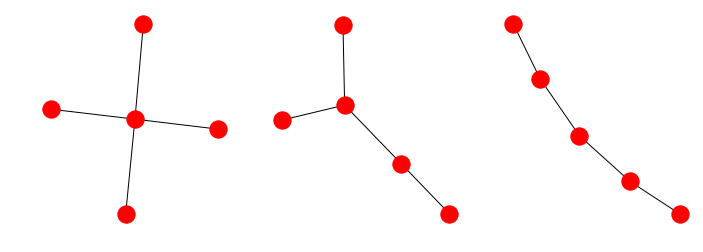

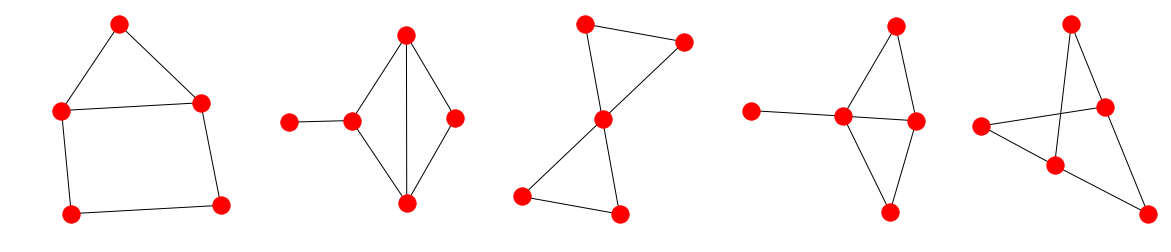

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

def determine_isomorphism(listofGraphs):
    for graph1 in listofGraphs:
        for graph2 in listofGraphs:
            if nx.is_isomorphic(graph1, graph2) == True and graph1 != graph2:
                return True
    return False

def determine_connected(listofGraphs):
    for graph in listofGraphs:
        if nx.is_connected(graph) == False:
            return False
    return True

A = nx.gnm_random_graph(5, 4)
B = nx.gnm_random_graph(5, 4)
C = nx.gnm_random_graph(5, 4)
D = nx.gnm_random_graph(5, 4)
E = nx.gnm_random_graph(5, 4)

while not determine_connected([A,B,C]) or determine_isomorphism([A,B,C]):
    A = nx.gnm_random_graph(5, 4)
    B = nx.gnm_random_graph(5, 4)
    C = nx.gnm_random_graph(5, 4)

fig1 = plt.figure(figsize=[20, 4])
ax = fig1.add_subplot(1, 5, 1)
nx.draw(A)
ax2 = fig1.add_subplot(1, 5, 2)
nx.draw(B)
ax3 = fig1.add_subplot(1, 5, 3)
nx.draw(C)

G = nx.gnm_random_graph(5, 6)
H = nx.gnm_random_graph(5, 6)
I = nx.gnm_random_graph(5, 6)
J = nx.gnm_random_graph(5, 6)
K = nx.gnm_random_graph(5, 6)

while not determine_connected([G,H,I,J,K]) or determine_isomorphism([G,H,I,J,K]):
    G = nx.gnm_random_graph(5, 6)
    H = nx.gnm_random_graph(5, 6)
    I = nx.gnm_random_graph(5, 6)
    J = nx.gnm_random_graph(5, 6)
    K = nx.gnm_random_graph(5, 6)

fig2 = plt.figure(figsize=[20, 4])
ax6 = fig2.add_subplot(1, 5, 1)
nx.draw(G)
ax7 = fig2.add_subplot(1, 5, 2)
nx.draw(H)
ax8 = fig2.add_subplot(1, 5, 3)
nx.draw(I)
ax9 = fig2.add_subplot(1, 5, 4)
nx.draw(J)
ax10 = fig2.add_subplot(1, 5, 5)
nx.draw(K)

## 3. The Laplacian

Consider the random graphs returned by `nx.fast_gnp_random_graph(n,p)` where $n$ is the number of nodes and $p$ is the probability of an edge between any two nodes. 

Make a list of graphs with $10$ nodes with $p$ ranging from 0 to 1 by steps of 0.01. For each graph, compute the eigenvalues of the Laplacian. Then plot all the eigenvalues for against $p$. For example, above $p=0.01$ you would have a point for each of the 10 real eigenvalues of the graph you made with $p=0.01$. 

What trends do you see in the eigenvalues?

Based on experimentation, what are the eigenvalues of the Laplacian of a completely connected graph?

In [ ]:
%matplotlib inline

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# generate 100 random graphs and increase p by 0.01 each time
graphList = []
for i in range(100):
    graphList.append(nx.fast_gnp_random_graph(10,(i/100)))

# generate a list of lists of eigenvalues (10 per graph)
eigenvalList = []
for graph in graphList:
    L = nx.laplacian_matrix(graph)
    e = np.linalg.eigvals(L.A)
    eigenvalList.append(e)
  
# generate the x axis and correspond the values with the eigenvalues
x = []                   
for i in range(100):
    for j in range(len(eigenvalList[0])):
        x.append((i/100))
npList = np.array(np.real(eigenvalList))
plt.plot(x, npList.flatten(), 'g.')

plt.xlabel('p')
plt.ylabel("eigenvalues")
plt.show()
print("As p increases, the eigenvalues trend upward with a max of 10 and a min of 0\n")

# explore the eigenvalues of a fully connected graph
G = nx.complete_graph(10)
GL = nx.laplacian_matrix(G)
GE = np.linalg.eigvals(GL.A)
print("Eigenvalues of the LaPlacian of a fully connected graph with 10 nodes: ")
print(GE)
print("The eigenvalues of a fully connected graph are 0 with a multiplicity 1 and 10 (aka the # of nodes) with a multiplicity n-1")

## 4. Dice

Suppose two dice are tossed, but that the dice are weighted so that 1 comes up as twice as likely as any other number for both dice. 

a) What is the probability of getting a sum of seven?

b) What is the probability of getting a sum of seven given that the first die comes up 1?

c) What is the probability neither die coming up 1?

d) What is the PDF of the random variable $X$ defined to the the sum of the two dice?

For this situation, the probability of rolling a 1 is twice as likely.

Let the probability of rolling any number other than one be:

$p = \frac{1}{6}$.

Therefore:

| Dice Number | 1 | 2 | 3 | 4 | 5 | 6 |
| - | - | - | - | - | - | - |
| Probability | 2p | p | p | p | p | p |

The probability of throwing a $1$ is $2p$.

The probability of anything else is $1p$ and there are $5$ other options so $5p$.

All probabilities must add up to 1.

$5p + 2p = 1$

$7p = 1$

$p = \frac{1}{7}$

Result: 

$p = \frac{1}{7}$


In [ ]:
import numpy as np

D1 = {1, 2, 3, 4, 5, 6}
D2 = D1 # the dice are the same

nodeNames = {}
for i in range(0, len(D1)):
    if i == 0:
        nodeNames[i] = 'start'
    else:
        nodeNames[i] = i
u = 1/49

# define probability matrix
P = u * np.ones((6,6))
P[0,0] = 4 * u

# find possible combinations of rolling a 7 
combos7 = []
weights7 = []
for i in range(1, 7):
    for j in range(1, 7):
        if i + j == 7:
            combos7.append((i,j))
            if i == 1 or j == 1:
                weights7.append(2/49)
            else:
                weights7.append(1/49)
print('Possible die combinations that sum to 7:', combos7)           
print('The probability of rolling the dice to sum to 7:', sum(weights7)*100, '%')

print('The probability that the sum is 7 given the first roll is 1:', weights7[0]*100, '%')


# find the probability that neither die roll contains 1
combos_not1 = []
weights_not1 = []
for n in range(1, 7):
    for m in range(1, 7):
        if n == 1 or m == 1:
            continue
        else:
            combos_not1.append((n,m))
# since these do not contain 1, the probability of any other combination is 1/49

print('probability that roll does not contain 1:', 1/49*len(combos_not1)*100, '%')

## 5. Functions of a Random Variable

Suppose $X$ is distributed uniformly in the interval $[0,1]$. That is, $f_X(x) = 1$ if $x \in [0,1]$ and $f_X(x) = 0$ otherwise. 

a) What is the CDF of $X$?

b) Let $Y = X^2$. Find and plot $F_Y$ and $f_Y$. 

## 6. Markov Process Properties

Consider the following three Markov Processes.
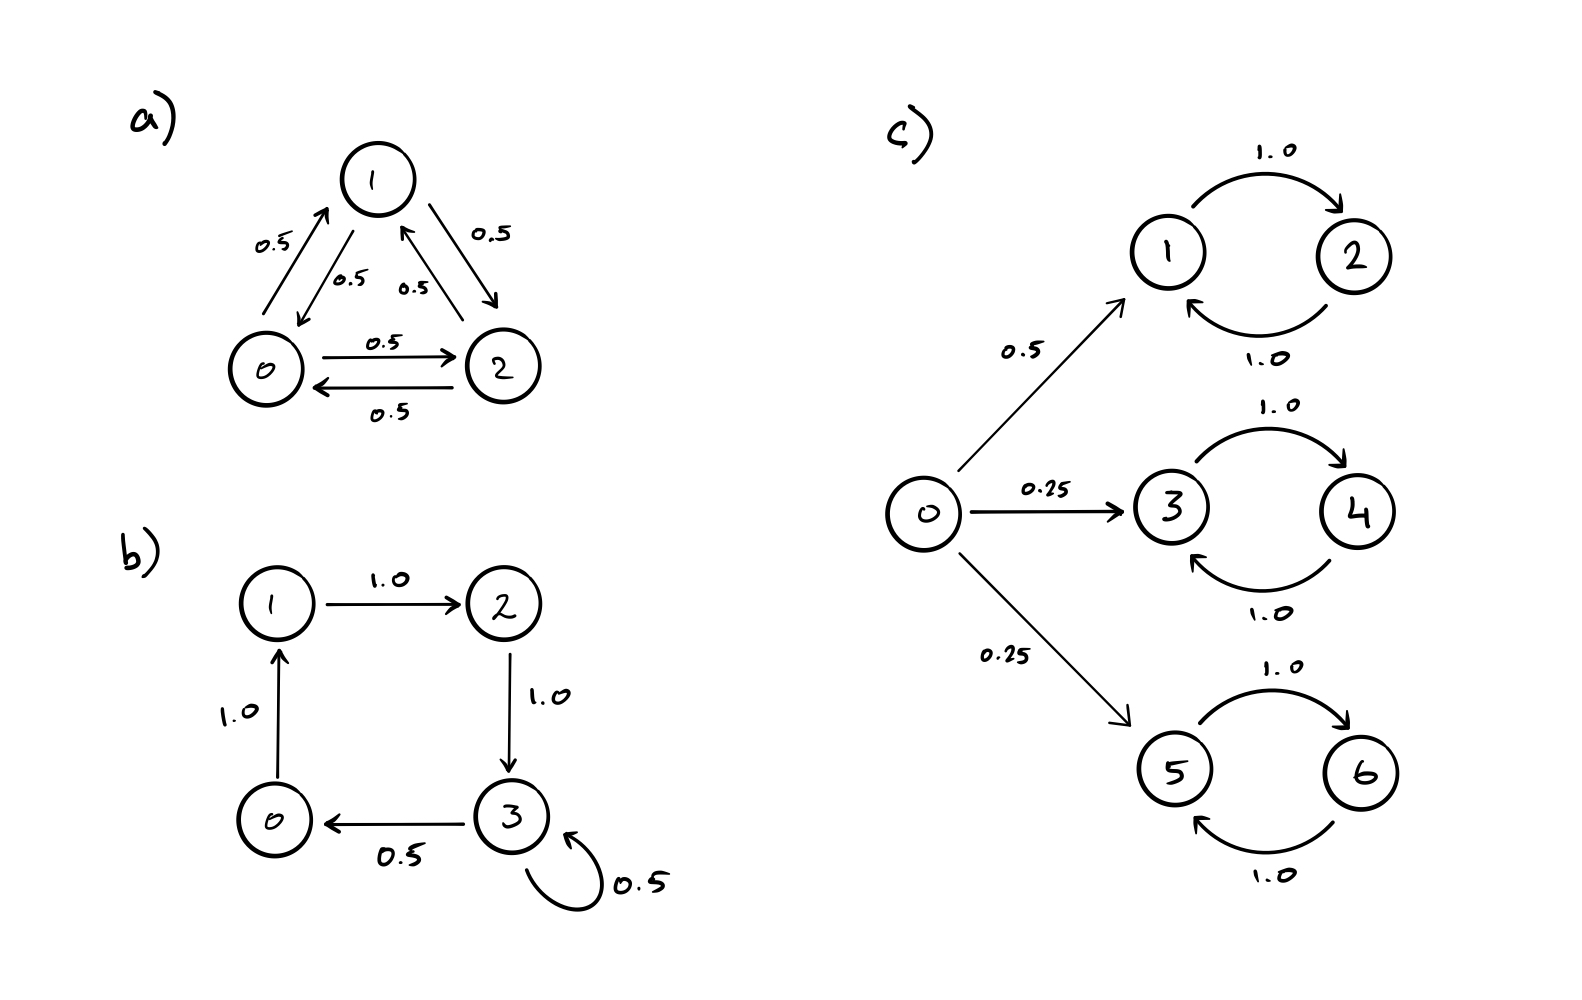

For each process,

i) Find the period of each state.

ii) Identify transient states.

iii) Identify absorbing states and absorbing subsets of states.

iv) Identify ergodic states.

## 7. Stationary Distributions

For each Markov Process in Problem 6:

i) Find the update matrix $Q$.

ii) Simulate the dynamics $p_{k+1} = p_k Q$ starting at the distribution in which $p_0(0) = 1$. Make a plot of the dynamics for each system. To do this, plot a 2D grid where grid point $(k,i)$ is a gray-scale square corresponding to the probability that the process is in state $i$ at time $k$ (the Gambler's Ruin example in the notes does this).